## Consuming data using Kafka
In this task, we will implement an Apache Kafka consumer to consume the data from part 2.  

In this part, use Kafka consumer to consume the streaming data published from task 2.8.  
This part doesn’t require parallel processing, please do not use Spark in this part. Using pandas or Python functions to do the simple calculations for visualisation.  

In [7]:
from time import sleep
from kafka3 import KafkaConsumer
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import json
import pandas as pd

# For Jupyter Notebook to display graphs inline
%matplotlib notebook

# Configuration
HOST_IP = "118.138.91.235"
TOPICS = ["for_visualisation", "another_topic"]
DATA = {
    "for_visualisation": [],
    "another_topic": []
}

def connect_kafka_consumer(topic_name):
    try:
        consumer = KafkaConsumer(
            topic_name,
            consumer_timeout_ms=100000,
            auto_offset_reset='earliest',
            bootstrap_servers=f'{HOST_IP}:9092',
            api_version=(0, 10)
        )
        return consumer
    except Exception as ex:
        print('Exception while connecting Kafka:', ex)
        return None

def consume_messages(consumer, topic_name):
    for message in consumer:
        record = json.loads(message.value)
        
        if topic_name == "another_topic":
            try:
                DATA[topic_name].append({
                    "revenue": record["revenue"],
                    "timestamp": message.timestamp
                })
#                 print(f"Revenue: {record['revenue']}, Kafka Timestamp: {message.timestamp}")
            except KeyError:
                print(f"Error processing message with offset {message.offset}. Message content: {record}")
        else:
            DATA[topic_name].append(record)

if __name__ == '__main__':
    for topic in TOPICS:
        consumer_instance = connect_kafka_consumer(topic)
        if consumer_instance:
            consume_messages(consumer_instance, topic)


In [8]:
df = pd.DataFrame(DATA["for_visualisation"])
data_sale_df = pd.DataFrame(DATA["another_topic"])
print(df)
print(data_sale_df)

     customer_id  prediction  \
0          88382         1.0   
1          17107         1.0   
2          89850         1.0   
3          95500         1.0   
4          55493         1.0   
...          ...         ...   
1437       52130         1.0   
1438        3850         1.0   
1439        3596         1.0   
1440        9015         1.0   
1441        7985         1.0   

                                    event_metadata_list  \
0     [{'product_id': 39175, 'quantity': 1, 'item_pr...   
1     [{'product_id': 49288, 'quantity': 1, 'item_pr...   
2     [{'product_id': 59305, 'quantity': 1, 'item_pr...   
3     [{'product_id': 28192, 'quantity': 6, 'item_pr...   
4     [{'product_id': 46977, 'quantity': 1, 'item_pr...   
...                                                 ...   
1437  [{'product_id': 10281, 'quantity': 1, 'item_pr...   
1438  [{'product_id': 13284, 'quantity': 1, 'item_pr...   
1439  [{'product_id': 40946, 'quantity': 1, 'item_pr...   
1440  [{'product_id': 546

## 1. Plot a diagram with two subplots to show the 30-second sales.  
Left subplot: Show a bar chart of sales every 30 seconds;  
Right Subplot: Show a line chart of cumulative sales.


<IPython.core.display.Javascript object>


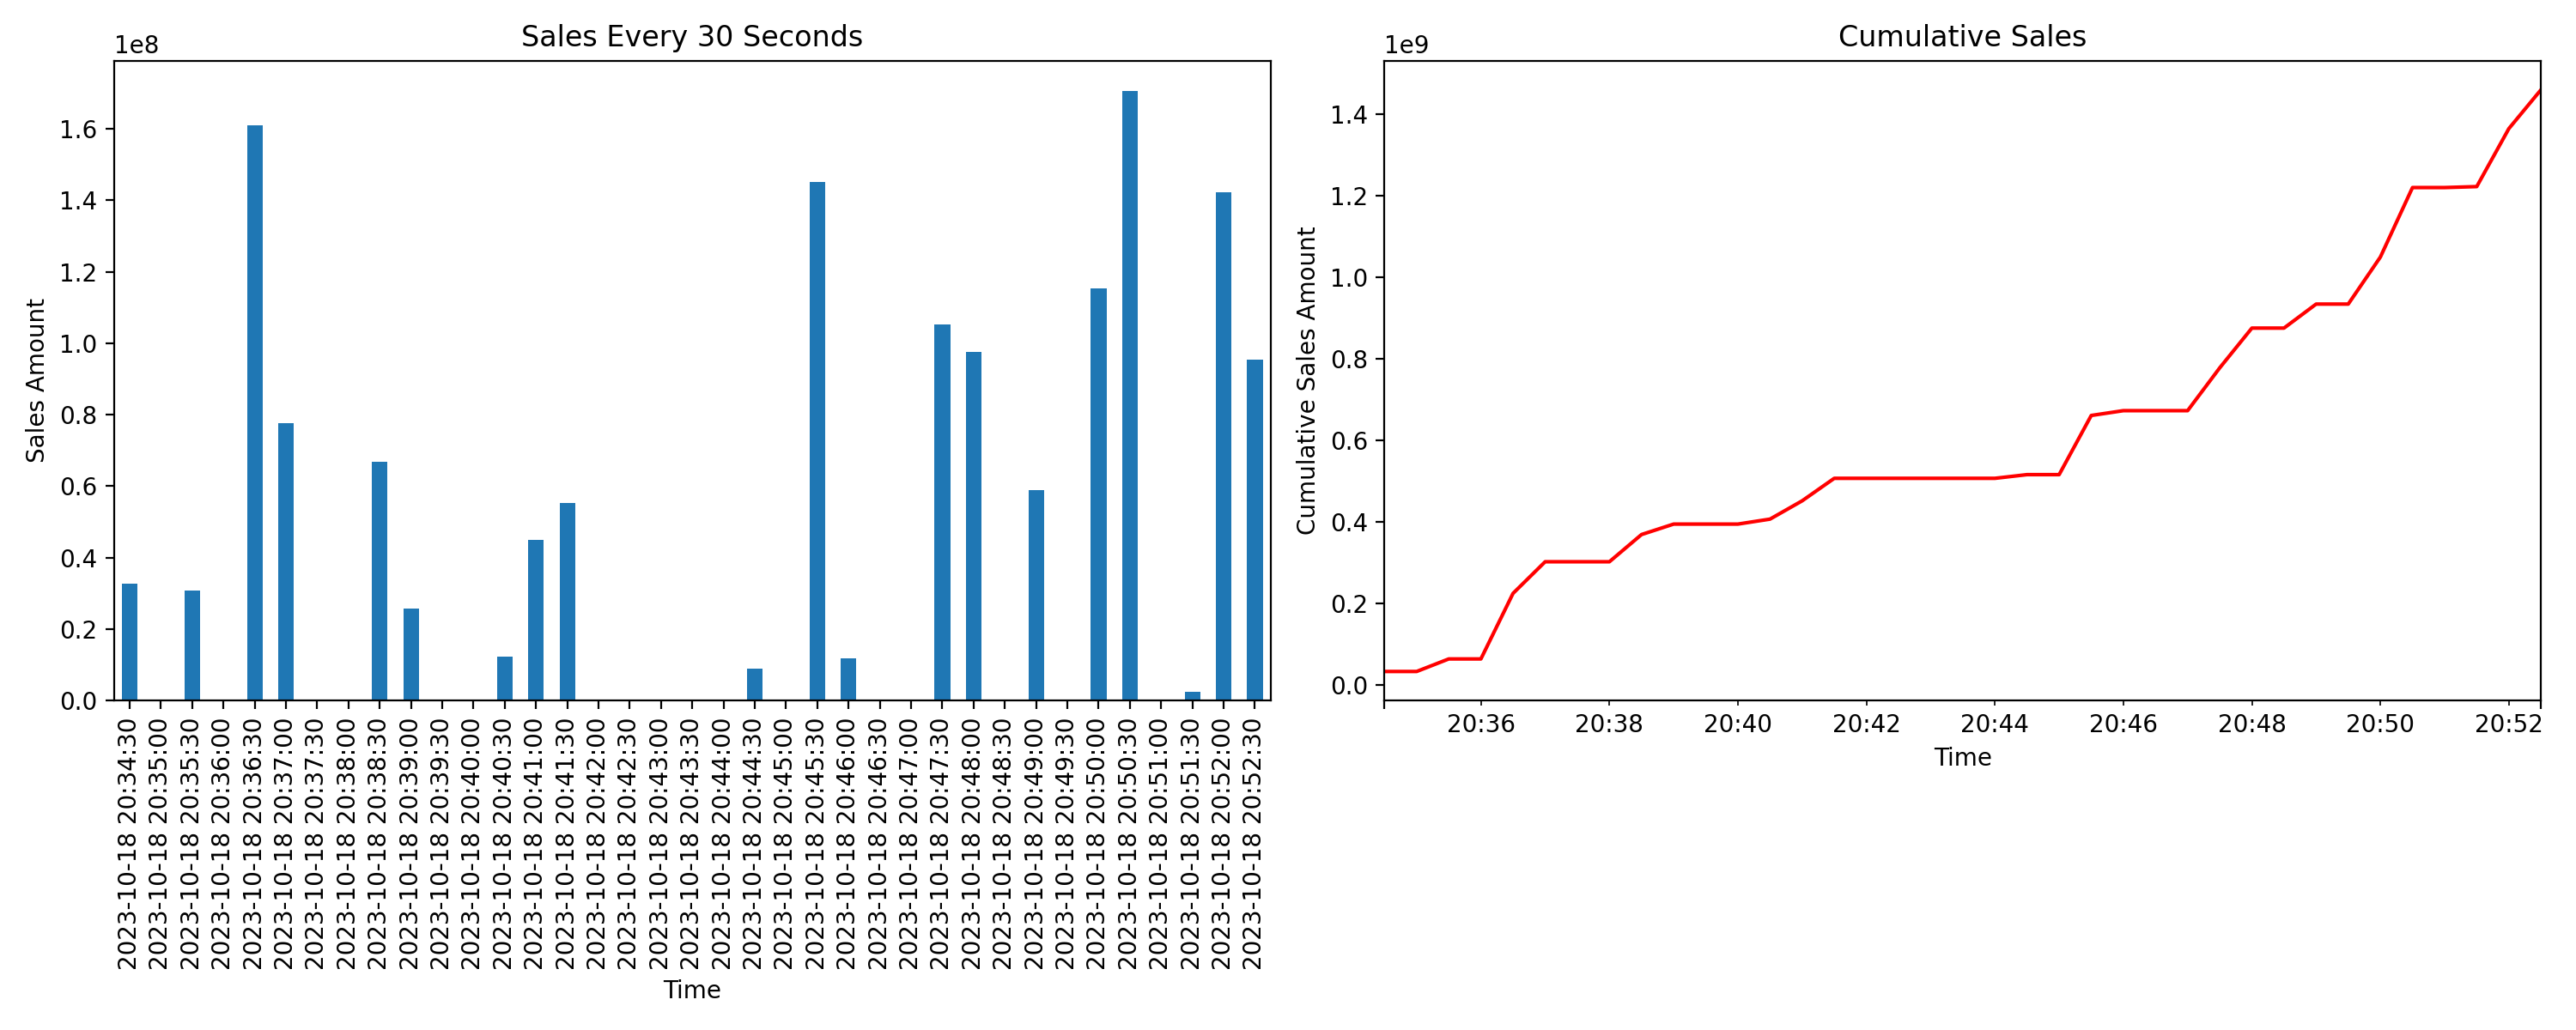

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%matplotlib notebook
import time


# Convert timestamp to datetime format and set it as the index
data_sale_df['datetime'] = pd.to_datetime(data_sale_df['timestamp'], unit='ms')
data_sale_df.set_index('datetime', inplace=True)

# Resample the data in 30-second intervals
resampled_data = data_sale_df.resample('30S').sum()

# Compute cumulative sales
resampled_data['cumulative_revenue'] = resampled_data['revenue'].cumsum()

# Plot the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Left subplot: Show sales every 30 seconds
resampled_data['revenue'].plot(kind='bar', ax=axes[0])
axes[0].set_title('Sales Every 30 Seconds')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Sales Amount')

# Right subplot: Show cumulative sales
resampled_data['cumulative_revenue'].plot(kind='line', ax=axes[1], color='r')
axes[1].set_title('Cumulative Sales')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Cumulative Sales Amount')

plt.tight_layout()
plt.show()


In [ ]:
from time import sleep
from kafka3 import KafkaConsumer
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import json
import pandas as pd

%matplotlib notebook

# Configuration
HOST_IP = "118.138.91.235"
TOPICS = ["for_visualisation", "another_topic"]
DATA = {
    "for_visualisation": [],
    "another_topic": []
}

def connect_kafka_consumer(topic_name):
    try:
        consumer = KafkaConsumer(
            topic_name,
            consumer_timeout_ms=30000,  # Adjusted to 30 seconds
            auto_offset_reset='earliest',
            bootstrap_servers=f'{HOST_IP}:9092',
            api_version=(0, 10)
        )
        return consumer
    except Exception as ex:
        print('Exception while connecting Kafka:', ex)
        return None

def consume_messages(consumer, topic_name):
    for message in consumer:
        record = json.loads(message.value.decode('utf-8'))
        
        if topic_name == "another_topic":
            try:
                DATA[topic_name].append({
                    "revenue": record["revenue"],
                    "timestamp": message.timestamp
                })
            except KeyError:
                print(f"Error processing message with offset {message.offset}. Message content: {record}")
        else:
            DATA[topic_name].append(record)

def plot_graph(data_sale_df):
    # Convert timestamp to datetime format and set it as the index
    data_sale_df['datetime'] = pd.to_datetime(data_sale_df['timestamp'], unit='ms')
    data_sale_df.set_index('datetime', inplace=True)

    # Resample the data in 30-second intervals
    resampled_data = data_sale_df.resample('30S').sum()

    # Compute cumulative sales
    resampled_data['cumulative_revenue'] = resampled_data['revenue'].cumsum()

    # Plot the subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Left subplot: Show sales every 30 seconds
    resampled_data['revenue'].plot(kind='bar', ax=axes[0])
    axes[0].set_title('Sales Every 30 Seconds')
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('Sales Amount')

    # Right subplot: Show cumulative sales
    resampled_data['cumulative_revenue'].plot(kind='line', ax=axes[1], color='r')
    axes[1].set_title('Cumulative Sales')
    axes[1].set_xlabel('Time')
    axes[1].set_ylabel('Cumulative Sales Amount')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    for topic in TOPICS:
        consumer_instance = connect_kafka_consumer(topic)
        if consumer_instance:
            consume_messages(consumer_instance, topic)
            if topic == "another_topic":
                plot_graph(pd.DataFrame(DATA[topic]))


### 2. Plot either a choropleth or bubble map of Indonesia and show the cumulative number of predicted orders in each state. If you plot a bubble map, add markers of total order count to each state.  
(note: The streaming data is sliding, you need to consider how to calculate the cumulative sum.)


In [10]:
!pip install plotly folium geopy

  Using cached plotly-5.17.0-py2.py3-none-any.whl (15.6 MB)
  Using cached folium-0.14.0-py2.py3-none-any.whl (102 kB)
  Using cached geopy-2.4.0-py3-none-any.whl (125 kB)
  Using cached tenacity-8.2.3-py3-none-any.whl (24 kB)
  Using cached branca-0.6.0-py3-none-any.whl (24 kB)
  Using cached geographiclib-2.0-py3-none-any.whl (40 kB)


In [ ]:
import pandas as pd
import folium


# Group by 'home_location' and count the number of orders
state_order_counts = df.groupby(['home_location', 'home_location_lat', 'home_location_long']).size().reset_index(name='order_count')

# Initialize the map centered around Indonesia
m = folium.Map(location=[-2.548926, 118.0148634], zoom_start=5)

# Add bubble markers for each state
for index, row in state_order_counts.iterrows():
    folium.CircleMarker(
        location=[row['home_location_lat'], row['home_location_long']],
        radius=row['order_count'] / 50,  # adjust the divisor to scale your bubbles
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.6
    ).add_child(folium.Popup(f"State: {row['home_location']}\nOrders: {row['order_count']}")).add_to(m)

# Save the map to an HTML file (optional)
m.save("indonesia_orders.html")

# Display the map
m


In [11]:
# Import the required library
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")

# Group by 'home_location' and count
location_counts = df.groupby('home_location').size().reset_index(name='value')

# Merge with the original df to get lat and lon values
merged_df = pd.merge(location_counts, df[['home_location', 'home_location_lat', 'home_location_long']], on='home_location', how='left')

# Drop duplicates
final_df = merged_df.drop_duplicates(subset='home_location').reset_index(drop=True)

# Rename columns for the desired format
final_df = final_df.rename(columns={'home_location_long': 'lon', 'home_location_lat': 'lat', 'home_location': 'name'})

In [12]:
# import the library
import pandas as pd
import folium

# Make an empty map
m = folium.Map(location=[-6.2, 106.8], tiles="OpenStreetMap", zoom_start=4)




import math
# add marker one by one on the map, and account for Mercator deformation
for city in final_df.itertuples():
    local_deformation = math.cos(city.lat * math.pi / 180)
    folium.Circle(
        location=[city.lat, city.lon],
        popup='%s (%.1f)' % (city.name, city.value),
        radius=city.value * 500.0 * local_deformation,
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(m)

# Show the map again
m

